# Analyzing an inference of GPT-2 using SHAP

For libraries, uncomment and run cell 1. Python 3.11.6 required (not 3.13.1!)

All code from the example here: https://shap.readthedocs.io/en/latest/example_notebooks/text_examples/text_generation/Open%20Ended%20GPT2%20Text%20Generation%20Explanations.html

ChatGPT only used to explore other plots (which ended up difficult to implement) and to discuss results.

In [1]:
#!pip install numpy pandas matplotlib scikit-learn shap transformers torch torchvision torchaudio

In [2]:
from transformers import AutoModelForCausalLM, AutoTokenizer

import shap

tokenizer = AutoTokenizer.from_pretrained("gpt2")
model = AutoModelForCausalLM.from_pretrained("gpt2")

# set model decoder to true
model.config.is_decoder = True
# set text-generation params under task_specific_params
model.config.task_specific_params["text-generation"] = {
    "do_sample": True,
    "max_length": 50,
    "temperature": 0,
    "top_k": 50,
    "no_repeat_ngram_size": 2,
}

In [3]:
s = ["How dare you eat my apple?!"]

explainer = shap.Explainer(model, tokenizer)

shap_values = explainer(s)

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


In [4]:
shap.plots.text(shap_values)

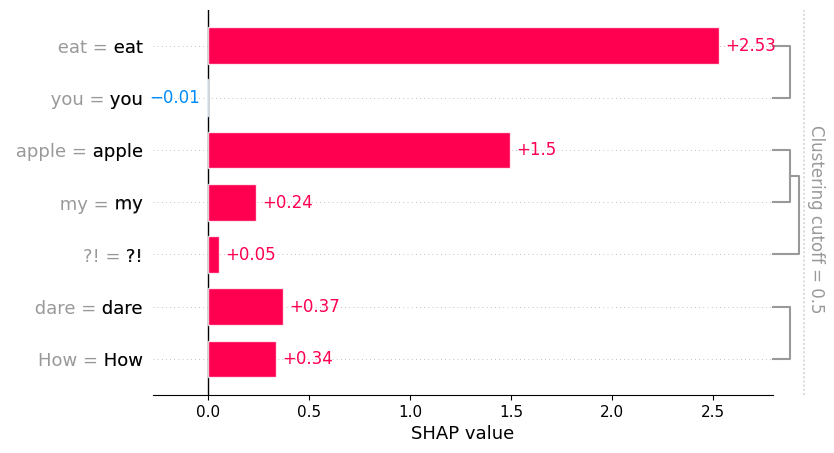

In [6]:
shap.plots.bar(shap_values[0, :, "eat"]) # Select a word of interest from the output to analyze

# Discussion

Why SHAP? I chose SHAP as it seemed to provide specific insights into a particular word generated by an LLM. This enables a close analysis of specific word outputs.

Strengths: SHAP can show clearly that specific words in the prompt strongly influence specific words in the output. This can help detect biases in the response of the model, why models prefer specific phrases, and explain unexpected words since we can clearly see which words triggered them, and can compare similar cases.

Limitations: Many of the potential plots that SHAP can usually output are difficult to generate for GPT-2 because the input is not structured cleanly like tabular data, and the summary and waterfall plots rely on numerical or tabular data, not token sequences. Also, since there are so many possible outputs (words) at each point, and because GPT-2 generates a distribution, not a single output, SHAP explanations can sometimes be limited in usefulness since SHAP usually assigns importance scores to discrete output categories. It also is not suited for long text generation.

Potential Improvements: More useful plots and visualizations could be developed to explain generated text. Perhaps animations or color-coded multi-dimensional plots. SHAP could also limit its search space and handle larger text generations better by focusing on the most likely words/tokens rather than the full vocabulary (perhaps by having a dataset that shows likely outputs) or analyzing concepts or entire sentences rather than individual words.